**Dynamic Programming: Value Iteration**

In this notebook, we implement the value iteration algorithm for the Gambler's Problem (Sutton&Barto book, Example 4.3) [adapted from Shangtong Zhang repository]

In [3]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

Define the model

In [8]:
GOAL = 100 # goal
STATES = np.arange(GOAL + 1) # all states, including state 0 and state 100
HEAD_PROB = 0.55 # probability of head

# state value
state_value = np.zeros(GOAL + 1)
state_value[GOAL] = 1.0

iteration = 0

Value Iteration

In [9]:
niter = 32
print('Value iteration, Iter %d' % (iteration))
while True:
    iteration += 1
    delta = 0.0
    for state in STATES[1:GOAL]:
        # get possilbe actions for current state
        actions = np.arange(min(state, GOAL - state) + 1)
        action_returns = []
        for action in actions:
            action_returns.append(
                HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action])
        new_value = np.max(action_returns)
        delta += np.abs(state_value[state] - new_value)
        # update state value
        state_value[state] = new_value
    if iteration == niter or delta < 1e-9:
        break

Value iteration, Iter 0


Compute the Optimal Policy


In [10]:
print('Compute Optimal Policy, Niter %d' % (niter))
policy = np.zeros(GOAL + 1)
for state in STATES[1:GOAL]:
    actions = np.arange(min(state, GOAL - state) + 1)
    action_returns = []
    for action in actions:
        action_returns.append(
            HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action])

    policy[state] = actions[np.argmax(np.round(action_returns[1:], 5)) + 1]

Compute Optimal Policy, Niter 32


Display current policy and value of states

Text(0, 0.5, 'Final policy (stake)')

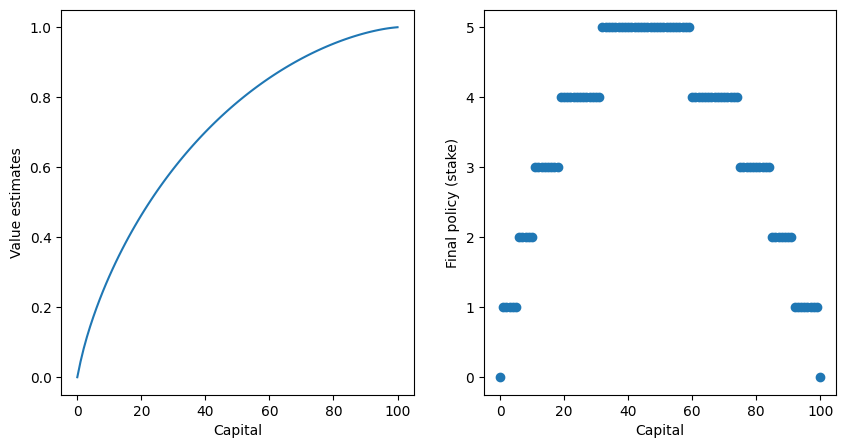

In [11]:
_, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
axes = axes.flatten()

# Plot Values
plt.subplot(1, 2, 1)
plt.plot(state_value)
plt.xlabel('Capital')
plt.ylabel('Value estimates')

# Plot Policy
plt.subplot(1, 2, 2)
plt.scatter(STATES, policy)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')


